In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dat
import json
%matplotlib inline

## Data cleaning

In [2]:
df = pd.read_csv('data/Torino_bookings.csv', usecols=range(1,7))
df.head()

,init_lon,init_lat,final_lon,final_lat,init_time,final_time
0,7.67558,45.05006,7.68445,45.07758,1509580742,1509582042
1,7.65616,45.07525,7.65070,45.07018,1509580496,1509580742
2,7.64856,45.03413,7.67219,45.05876,1509580496,1509581097
3,7.68326,45.09124,7.66940,45.07630,1509580196,1509581097
4,7.65270,45.07969,7.67192,45.07553,1509580048,1509581148


In [3]:
# timestamp conversion
from datetime import datetime

df.loc[:,'init_time'] = df['init_time'].apply(datetime.fromtimestamp)
df.loc[:,'final_time'] = df['final_time'].apply(datetime.fromtimestamp)
df.head()

,init_lon,init_lat,final_lon,final_lat,init_time,final_time
0,7.67558,45.05006,7.68445,45.07758,2017-11-02 00:59:02,2017-11-02 01:20:42
1,7.65616,45.07525,7.65070,45.07018,2017-11-02 00:54:56,2017-11-02 00:59:02
2,7.64856,45.03413,7.67219,45.05876,2017-11-02 00:54:56,2017-11-02 01:04:57
3,7.68326,45.09124,7.66940,45.07630,2017-11-02 00:49:56,2017-11-02 01:04:57
4,7.65270,45.07969,7.67192,45.07553,2017-11-02 00:47:28,2017-11-02 01:05:48


In [4]:
df1 = df.copy()
df1['date'] = df['init_time'].dt.date
df1['hour'] = df['init_time'].dt.hour
df1.head()

,init_lon,init_lat,final_lon,final_lat,init_time,final_time,date,hour
0,7.67558,45.05006,7.68445,45.07758,2017-11-02 00:59:02,2017-11-02 01:20:42,2017-11-02,0
1,7.65616,45.07525,7.65070,45.07018,2017-11-02 00:54:56,2017-11-02 00:59:02,2017-11-02,0
2,7.64856,45.03413,7.67219,45.05876,2017-11-02 00:54:56,2017-11-02 01:04:57,2017-11-02,0
3,7.68326,45.09124,7.66940,45.07630,2017-11-02 00:49:56,2017-11-02 01:04:57,2017-11-02,0
4,7.65270,45.07969,7.67192,45.07553,2017-11-02 00:47:28,2017-11-02 01:05:48,2017-11-02,0


In [5]:
df1['duration'] = (df1['final_time'] - df1['init_time']).dt.seconds/60
df1['duration'].describe()

count    122016.000000
mean         21.633042
std          18.774234
min           1.033333
25%          14.183333
50%          19.850000
75%          26.866667
max        1432.450000
Name: duration, dtype: float64

In [6]:
df1 = df1[(df1['duration'] > 5) & (df1['duration'] < 120)].reset_index(drop = True)
df1['duration'].describe()

count    120854.000000
mean         21.616624
std           9.967236
min           5.016667
25%          14.316667
50%          19.966667
75%          26.933333
max          60.000000
Name: duration, dtype: float64

In [ ]:
df1.to_csv("data_processed.csv", index=False)

In [77]:
df1.groupby('date').count()

,init_lon,init_lat,final_lon,final_lat,init_time,final_time,hour,duration
date,,,,,,,,
2017-09-05,1302,1302,1302,1302,1302,1302,1302,1302
2017-09-06,2164,2164,2164,2164,2164,2164,2164,2164
2017-09-07,2198,2198,2198,2198,2198,2198,2198,2198
2017-09-08,2175,2175,2175,2175,2175,2175,2175,2175
2017-09-09,1732,1732,1732,1732,1732,1732,1732,1732
2017-09-10,1333,1333,1333,1333,1333,1333,1333,1333
2017-09-11,2033,2033,2033,2033,2033,2033,2033,2033
2017-09-12,2094,2094,2094,2094,2094,2094,2094,2094
2017-09-13,2181,2181,2181,2181,2181,2181,2181,2181


In [54]:
import datetime

df1[df1['date']==datetime.date(2017,9,11)].groupby('hour').count()

,init_lon,init_lat,final_lon,final_lat,init_time,final_time,date,duration
hour,,,,,,,,
0,32,32,32,32,32,32,32,32
1,16,16,16,16,16,16,16,16
2,7,7,7,7,7,7,7,7
3,8,8,8,8,8,8,8,8
4,7,7,7,7,7,7,7,7
5,25,25,25,25,25,25,25,25
6,36,36,36,36,36,36,36,36
7,85,85,85,85,85,85,85,85
8,141,141,141,141,141,141,141,141


In [ ]:
df1.to_csv("data/data_processed.csv", index=False)

## Statoin clustering

In [7]:
# Select data
df1 = pd.read_csv("data/data_processed.csv", parse_dates = ['init_time','final_time'])
date = pd.date_range(start='9/11/2017', end='9/15/2017')
df1 = df1[(df1['init_time'].dt.date).astype(str).isin(date.astype(str))].reset_index(drop = True)

In [8]:
X1 = np.array(df1[['init_lon','init_lat']])

X = X1

#### DBSCAN

In [31]:
# distance between points
from math import radians, cos, sin, asin, sqrt, degrees, atan2

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r


# center
def center_geolocation(geolocations):
    """
    Provide a relatively accurate center lat, lon returned as a list pair, given
    a list of list pairs(in degree).
    ex: in: geolocations = ((lon1, lat1), (lon2, lat2),)
        out: (center_lon, center_lat)
    """
    # convert decimal degrees to radians 
    points = geolocations.copy()
    for i in range(len(points)):
        points[i,0], points[i,1] = map(radians, points[i])
        
    x = 0
    y = 0
    z = 0

    for lon, lat in points:
        lat = float(lat)
        lon = float(lon)
        x += cos(lat) * cos(lon)
        y += cos(lat) * sin(lon)
        z += sin(lat)

    x = float(x / len(points))
    y = float(y / len(points))
    z = float(z / len(points))
    
    # Convert average x, y, z coordinate to latitude and longitude.
    Lon = atan2(y, x)
    hyp = sqrt(x * x + y * y)
    Lat = atan2(z, hyp)
    Lon, Lat = map(degrees, [Lon, Lat])
    return (round(Lon,5), round(Lat,5))

In [32]:
# Calculate distance matrix
distance_matrix = np.zeros((X.shape[0],X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if distance_matrix[j][i] != 0:
            distance_matrix[i][j] = distance_matrix[j][i]
        else:
            distance_matrix[i][j] = haversine(X[i,0],X[i,1],X[j,0],X[j,1])

In [33]:
fit_data = distance_matrix

In [34]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=100, metric = 'precomputed').fit(fit_data)
labels = dbscan.labels_
clusters = np.max(labels) + 1
centers = np.zeros((clusters,2))

In [23]:
# Get centers of clusters
for i in range(clusters):
    points = X[labels==i,:]
    centers[i,0], centers[i,1] = center_geolocation(points)

In [127]:
# Number of points in each cluster
print(fit_data.shape)
for i in range(clusters):
       print(sum(labels==i))
print(sum(labels==-1))

(10831, 10831)
9204
138
222
158
64
1045


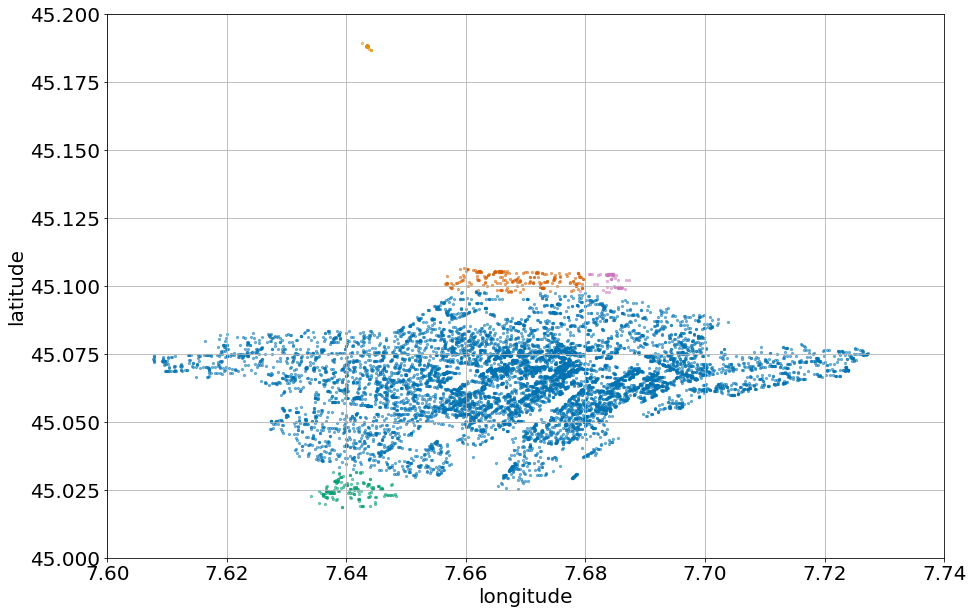

In [36]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,10))
color = sns.color_palette("colorblind", clusters)
for i in range(clusters):
    plt.scatter(X[labels==i,0], X[labels==i,1],label = 'station'+str(i), color = color[i], s=5, alpha = 0.5)
#plt.scatter(centers[:,0], centers[:,1], label = 'center',marker = 'x', s=30, color = 'black')
#plt.legend()
plt.xlim([7.60,7.74])
plt.ylim([45.0,45.2])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid()

#### kmeans

In [9]:
from sklearn.cluster import KMeans
clusters = 10
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

Text(0, 0.5, 'latitude')

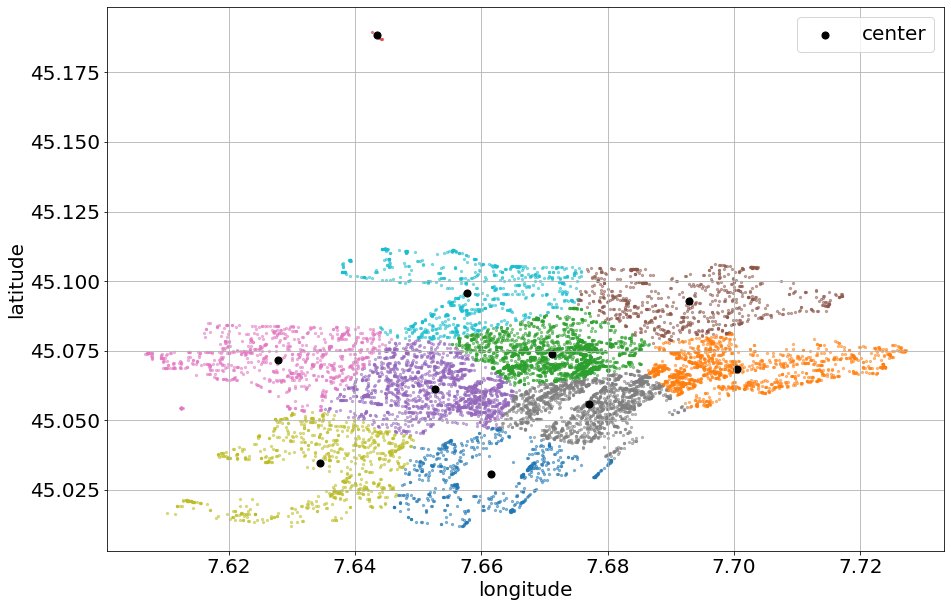

In [10]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,10))
color = sns.color_palette("colorblind", clusters)
for i in range(clusters):
    plt.scatter(X[labels==i,0], X[labels==i,1], s=5, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], label = 'center',marker = 'o', s=50, color = 'black')
plt.legend()
plt.grid()
plt.xlabel('longitude')
plt.ylabel('latitude')

#### kmedoids

In [14]:
from sklearn_extra.cluster import KMedoids
clusters = 10
kmedoids = KMedoids(n_clusters=clusters, random_state=0, init='k-medoids++').fit(X)
labels = kmedoids.labels_
centers = kmedoids.cluster_centers_

Text(0, 0.5, 'latitude')

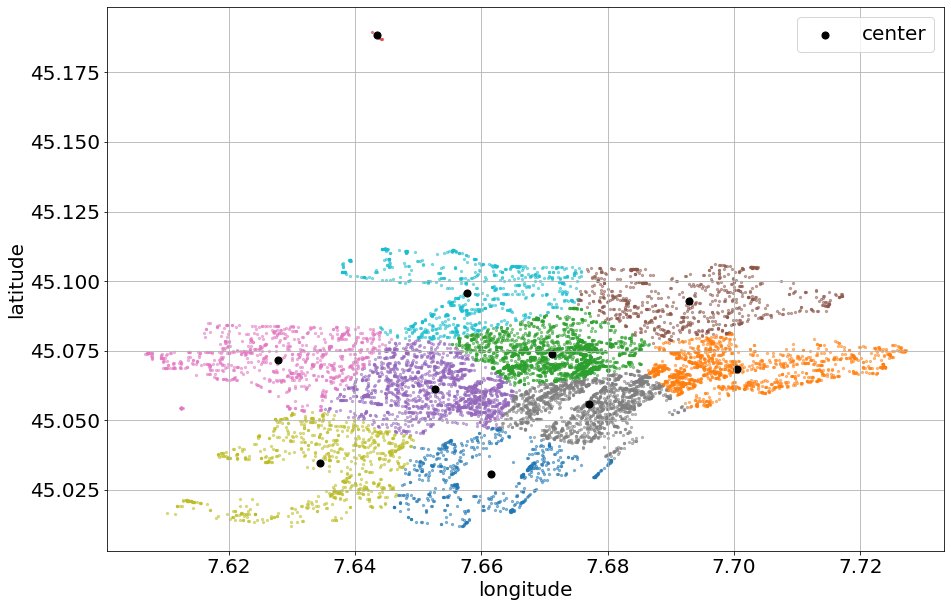

In [11]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,10))
color = sns.color_palette("colorblind", clusters)
for i in range(clusters):
    plt.scatter(X[labels==i,0], X[labels==i,1], s=5, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], label = 'center',marker = 'o', s=50, color = 'black')
plt.legend()
plt.grid()
plt.xlabel('longitude')
plt.ylabel('latitude')

Text(0, 0.5, 'latitude')

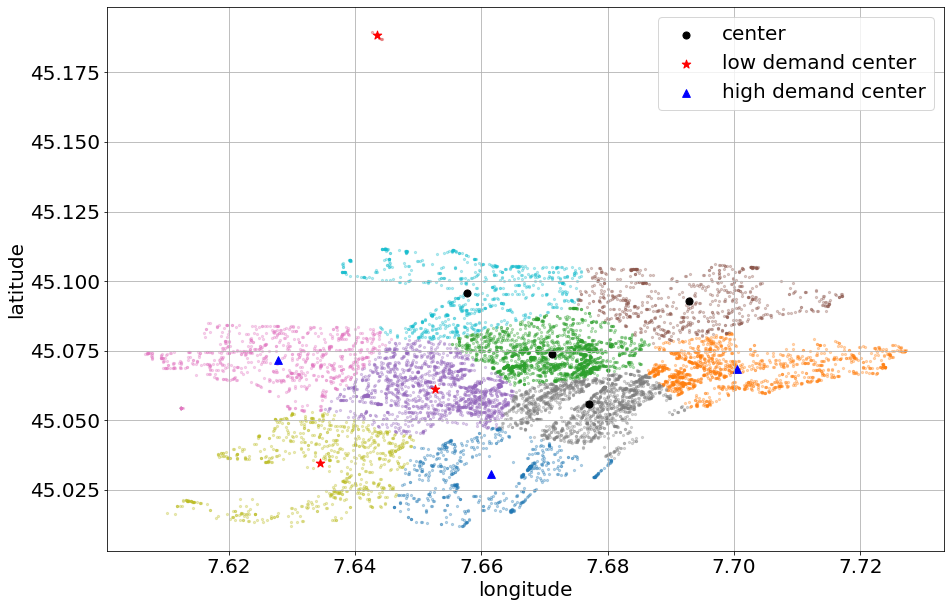

In [12]:
plt.figure(figsize=(15,10))
color = sns.color_palette("colorblind", clusters)
for i in range(clusters):
    plt.scatter(X[labels==i,0], X[labels==i,1], s=5, alpha=0.3)
plt.scatter(centers[[2,5,7,9],0], centers[[2,5,7,9],1], label = 'center',marker = 'o', s=50, color = 'black')
plt.scatter(centers[[3,4,8],0], centers[[3,4,8],1], label = 'low demand center', marker = '*', s=80, color = 'red')
plt.scatter(centers[[0,1,6],0], centers[[0,1,6],1], label = 'high demand center', marker = '^', s=60, color = 'blue')
plt.grid()
plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')

## Distance calculation

In [7]:
##################### Google map ####################

import requests, json

def calculate_distance(origins, destinations):
    '''
    calculate distance and traveling time between stations
    '''
    # url variable store url 
    url ='https://maps.googleapis.com/maps/api/distancematrix/json?'

    # enter your api key here
    api_key ="YOUR_KEY"

    # return response object
    payload={}
    headers = {}

    url = url + 'origins=' + origins + \
                '&destinations=' + destinations + \
                '&key=' + api_key
    response = requests.request("GET", url, headers=headers, data=payload)

    # json method of response object
    # return json format result
    x = response.json()
    
    return x

In [8]:
distance = pd.DataFrame({'origin':[],'destination':[],'distance':[],'time':[]})
s = len(centers)

for i in range(s):
    
    # Get formatted string for origin and destination
    
    origin = str(centers[i][1])+"%2C"+str(centers[i][0])
    destinations = []
    stations = []
    
    for j in range(s):
        if i!=j:
            destinations.append(str(centers[j][1])+"%2C"+str(centers[j][0]))
            # Keep track of station number
            stations.append(j)
    
    destinations = "%7C".join(destinations)
    result = calculate_distance(origin, destinations)
    
    # Parse response message
    
    result = result['rows'][0]['elements']
    
    for station, resp in zip(stations, result):
        temp = [i, station, resp['distance']['value'], resp['duration']['value']]
        distance.loc[len(distance.index)] = temp

In [9]:
distance.head()

,origin,destination,distance,time
0,0.0,1.0,6325.0,865.0
1,0.0,2.0,7424.0,1240.0
2,0.0,3.0,24167.0,2265.0
3,0.0,4.0,6180.0,1009.0
4,0.0,5.0,10093.0,1525.0


In [ ]:
distance.to_csv("distance_10.csv", index=False)

## System dynamic

In [17]:
# Assign by clustering result
df1 = pd.read_csv("data/data_processed.csv", parse_dates = ['init_time','final_time'])
distance = pd.read_csv("data/distance_10.csv")
date = pd.date_range(start='9/11/2017', end='9/15/2017')
df1 = df1[(df1['init_time'].dt.date).astype(str).isin(date.astype(str))].reset_index(drop = True)
df1['origin'] = labels
df1['destination'] = kmedoids.predict(np.array(df1[['final_lon','final_lat']]))

In [18]:
result = df1.merge(distance, how = 'left', on = ['origin','destination'])[['init_time','origin','destination','distance','time']]
result = result.dropna()

In [19]:
result

,init_time,origin,destination,distance,time
0,2017-09-15 23:59:01,1,6,7661.0,1363.0
1,2017-09-15 23:59:01,5,7,6824.0,1240.0
2,2017-09-15 23:58:14,6,0,7691.0,1222.0
3,2017-09-15 23:58:14,6,0,7691.0,1222.0
4,2017-09-15 23:58:14,7,6,4592.0,814.0
...,...,...,...,...,...
10728,2017-09-11 00:06:31,1,9,5687.0,1047.0
10729,2017-09-11 00:06:31,9,2,3548.0,709.0
10731,2017-09-11 00:05:43,9,2,3548.0,709.0
10732,2017-09-11 00:04:54,0,9,11278.0,1648.0


In [20]:
data = result[(result['init_time'].dt.date == dat.date(2017,9,13))]
data['hour'] = data['init_time'].dt.hour
data = data[['origin','destination','hour']]

<ipython-input-20-a8be97c35757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['init_time'].dt.hour


In [21]:
pickup = data.groupby(by = ['origin','hour']).count().reset_index()
pickup.columns = ["station","hour","number"]

In [22]:
dropoff = data.groupby(by = ['destination','hour']).count().reset_index()
dropoff.columns = ["station","hour","number"]

In [23]:
def interpolate_station(df):
    temp = pd.DataFrame({"hour":range(24),"dummy":[0]*24})
    temp_df = df.merge(temp, left_on = ['hour'], right_on = ['hour'], how = 'right')
    temp_df['station'] = temp_df['station'].fillna(df['station'].values[0])
    temp_df['number'] = temp_df['number'].fillna(0)
    return temp_df[['station','hour','number']]

In [24]:
all_stations = []
for i in range(10):
    all_stations.append(interpolate_station(pickup[pickup['station']==i]))
    
pickup = pd.concat(all_stations, axis = 0)
pickup.loc[:,'station'] = pickup.loc[:,'station'].astype(int)
pickup.loc[:,'number'] = -pickup.loc[:,'number'].astype(int)

In [25]:
all_stations = []
for i in range(10):
    all_stations.append(interpolate_station(dropoff[dropoff['station']==i]))
    
dropoff = pd.concat(all_stations, axis = 0)
dropoff.loc[:,'station'] = dropoff.loc[:,'station'].astype(int)
dropoff.loc[:,'number'] = dropoff.loc[:,'number'].astype(int)

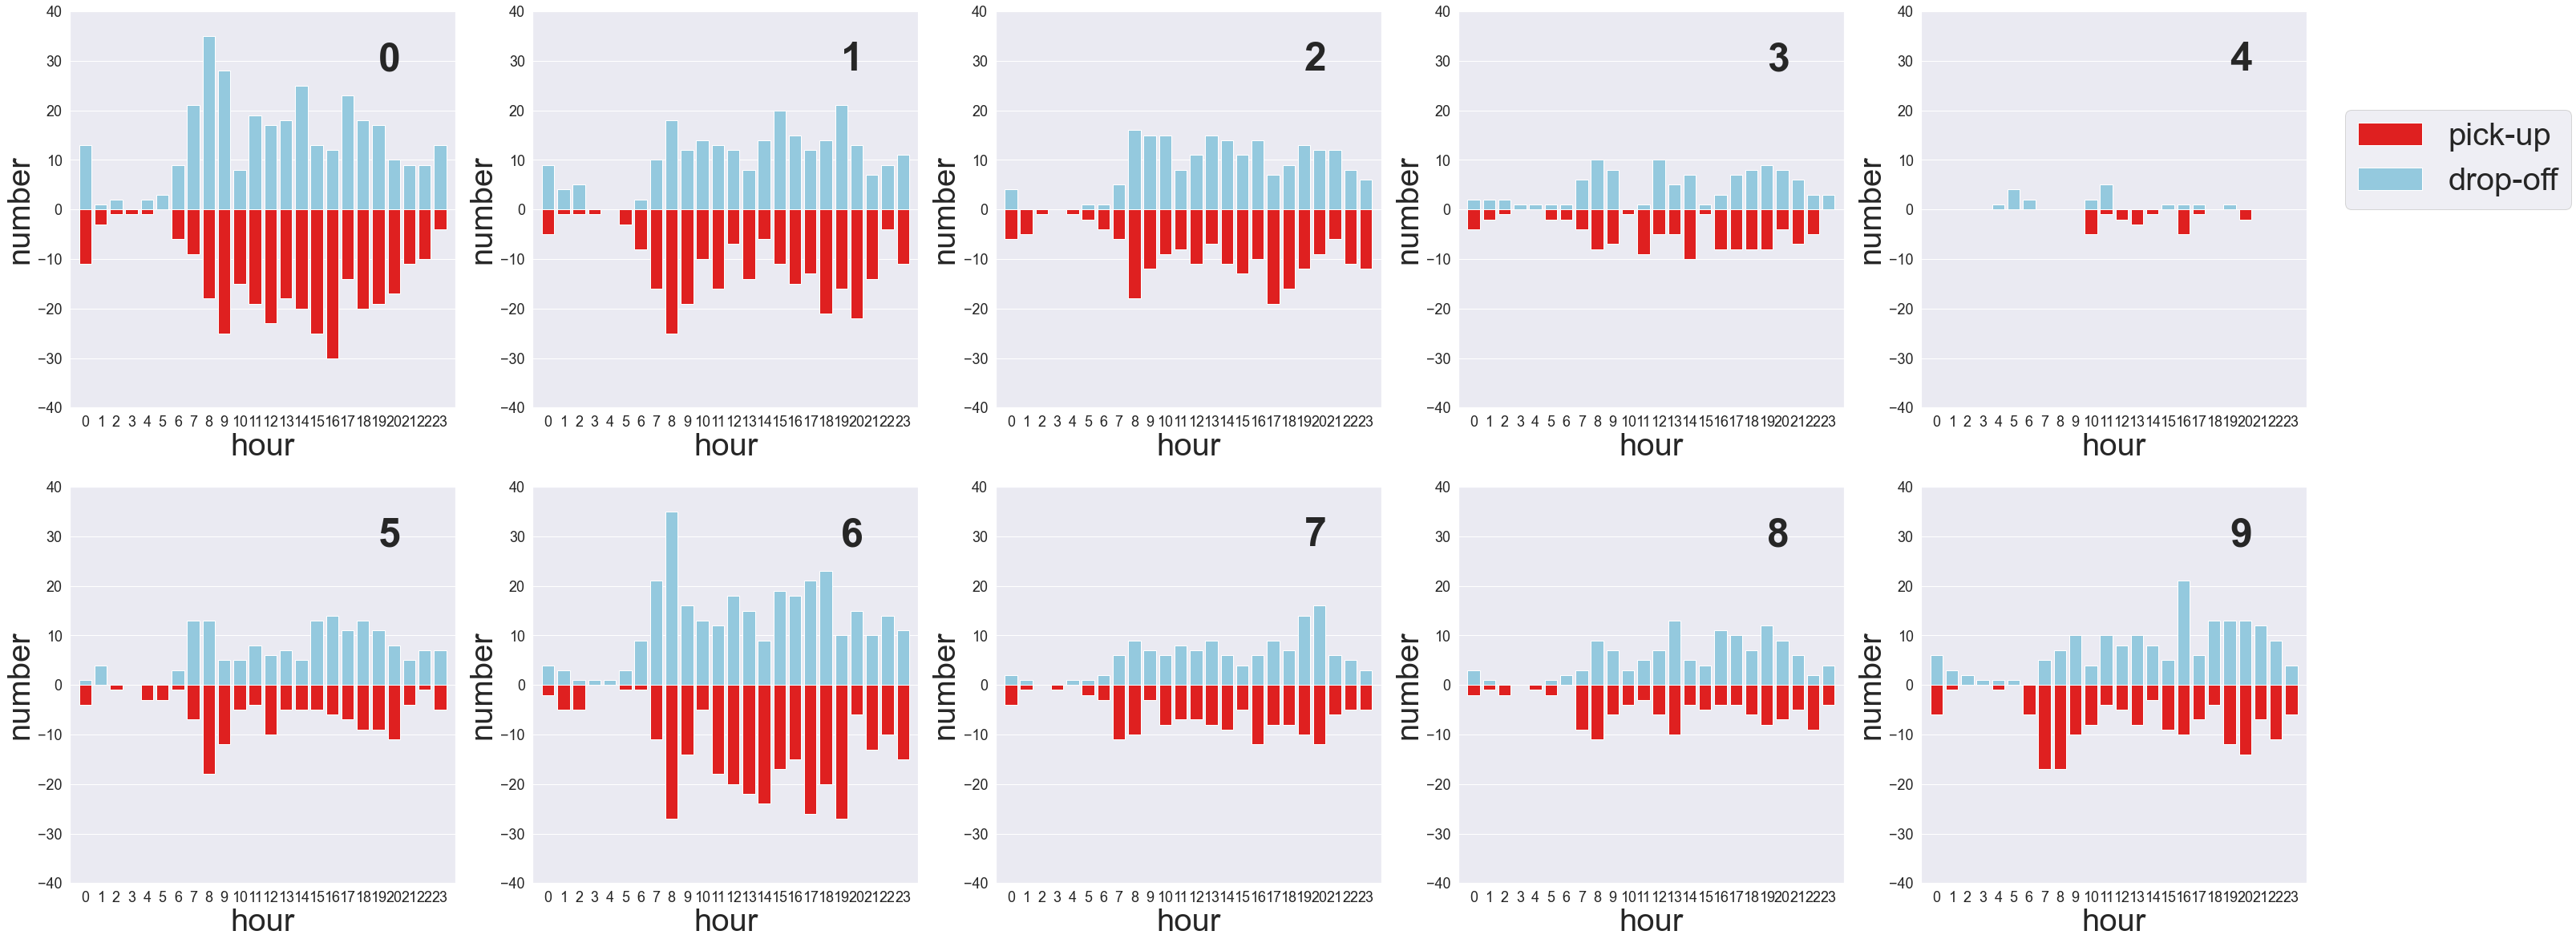

In [26]:
# Pick-ups and drop-offs
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.rcParams.update({'xtick.labelsize': 18,'ytick.labelsize': 18})

fig, axs = plt.subplots(2, 5, figsize=(50, 20))

for i,ax in zip(range(10),axs.flatten()):
    
    # Add the title as an annotation within the plot
    ax.text(.8, .85, i, transform=ax.transAxes, fontweight="bold", fontsize = 50)

    sns.barplot(data=pickup[pickup['station']==i], x="hour", y="number", color="red", ax=ax, label="pick-up")
    b = sns.barplot(data=dropoff[dropoff['station']==i], x="hour", y="number", color="skyblue", ax=ax, label="drop-off")
    b.set_xlabel("hour", fontsize = 40)
    b.set_ylabel("number", fontsize = 40)


plt.setp(axs, xlim=[-1,24], ylim=[-40,40])
axs[0][4].legend(loc=(1.1, 0.5),fontsize = 40)
plt.show()

In [17]:
def number_vehicles(df_p, df_d):
    res = pd.DataFrame({"station":[],"hour":[],"vehicle":[]})
    for t in range(1,24):
        v = df_d[df_d['hour']<t]['number'].sum() + df_p[df_p['hour']<t]['number'].sum()
        res = pd.concat([res,pd.DataFrame({"station":[df_p['station'].values[0]],"hour":[t],"vehicle":[v]})],axis=0)
        
    return res

In [18]:
all_stations = []
for i in range(10):
    all_stations.append(number_vehicles(pickup[pickup['station']==i],dropoff[dropoff['station']==i]))
    
vehicles = pd.concat(all_stations, axis = 0)
vehicles.loc[:,'station'] = vehicles.loc[:,'station'].astype(int)
vehicles.loc[:,'hour'] = vehicles.loc[:,'hour'].astype(int)
vehicles.loc[:,'vehicle'] = vehicles.loc[:,'vehicle'].astype(int)

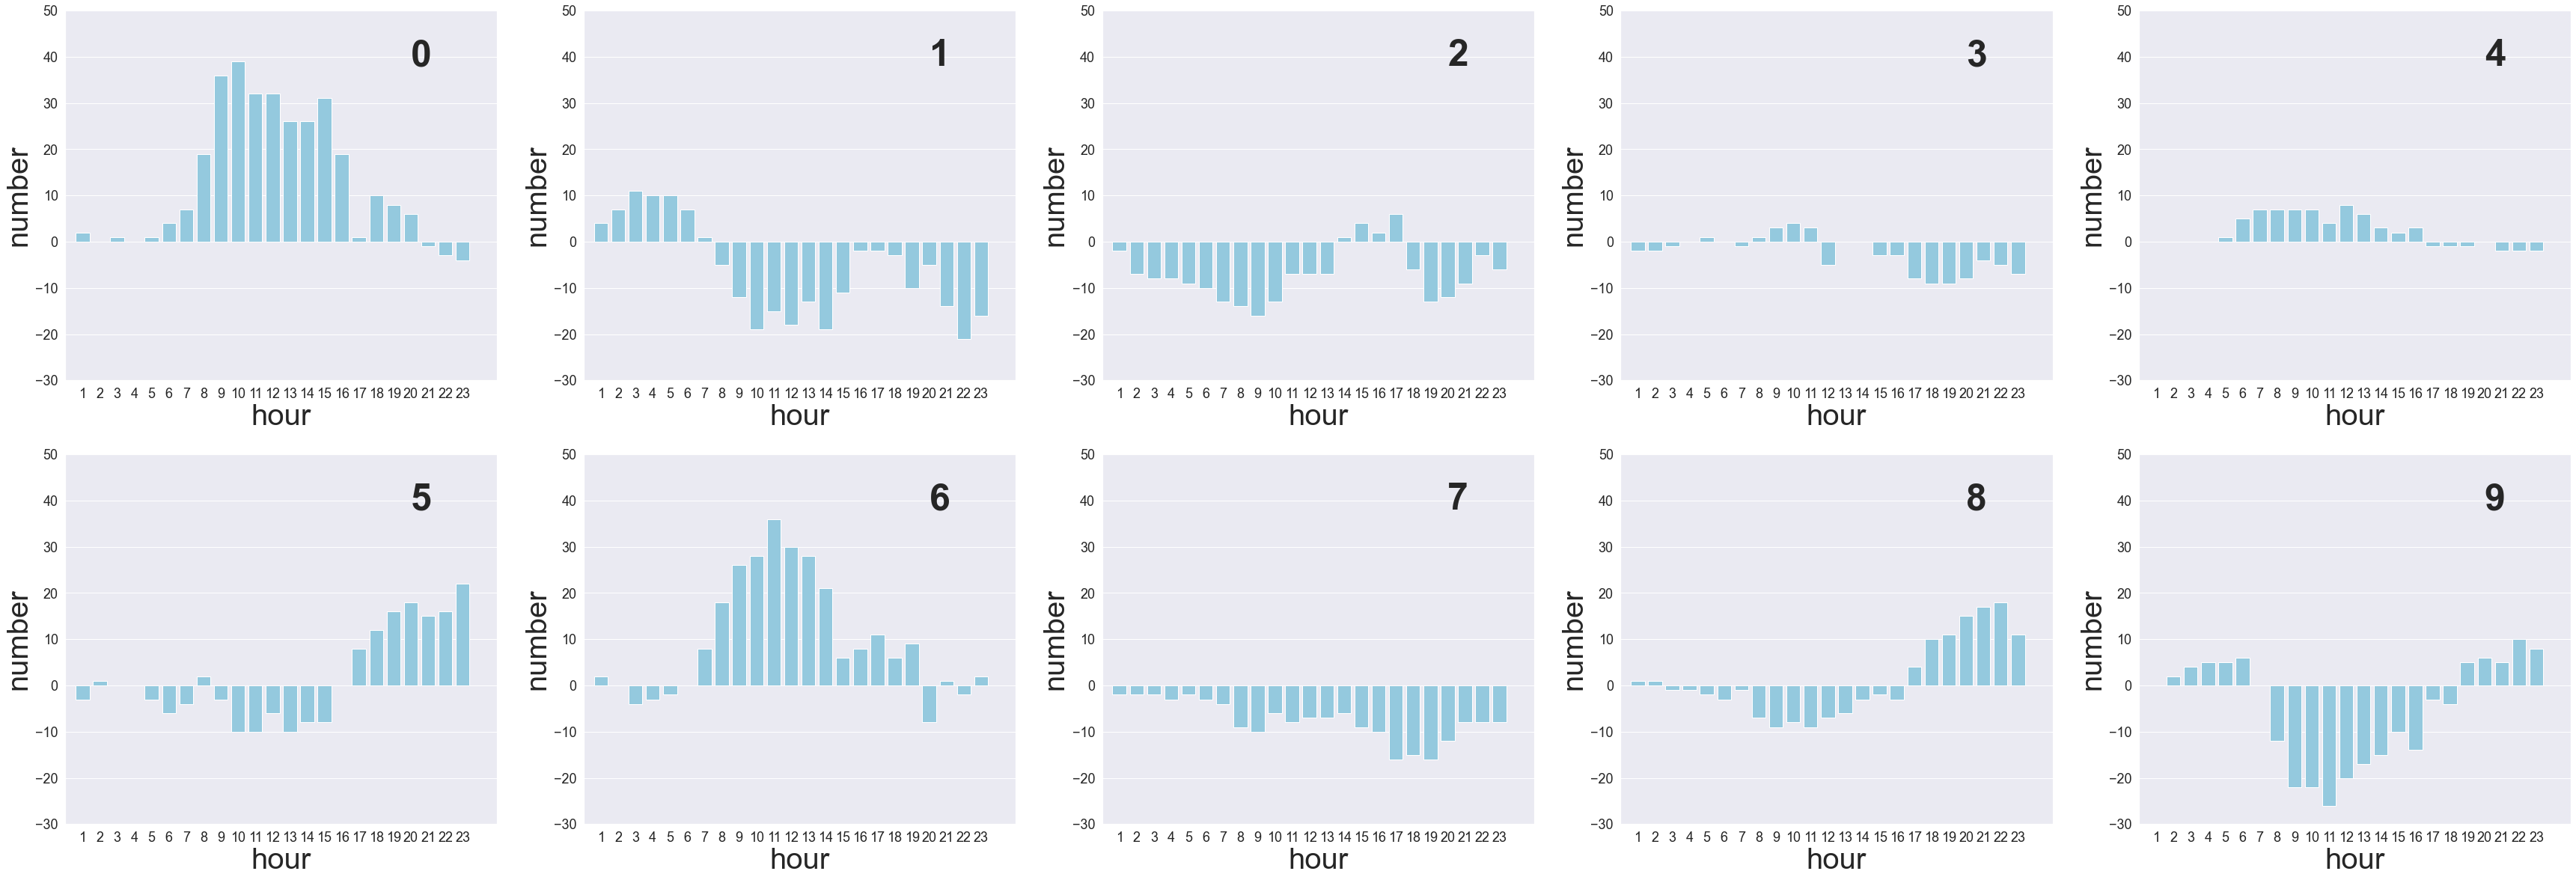

In [20]:
# Number of vehicles in stations
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.rcParams.update({'xtick.labelsize': 18,'ytick.labelsize': 18})

fig, axs = plt.subplots(2, 5, figsize=(60, 20))

for i,ax in zip(range(20),axs.flatten()):
    
    # Add the title as an annotation within the plot
    ax.text(.8, .85, i, transform=ax.transAxes, fontweight="bold", fontsize = 50)
    
    b = sns.barplot(data=vehicles[vehicles['station']==i], x="hour", y="vehicle", color="skyblue", ax=ax)
    b.set_xlabel("hour", fontsize = 40)
    b.set_ylabel("number", fontsize = 40)    
    
plt.setp(axs, xlim=[-1,24], ylim=[-30,50])
plt.show()

## Input for model 1

### Get customer arc

In [28]:
# Assign by clustering result
df1 = pd.read_csv("data/data_processed.csv", parse_dates = ['init_time','final_time'])
date = pd.date_range(start='9/11/2017', end='9/15/2017')
df1 = df1[(df1['init_time'].dt.date).astype(str).isin(date.astype(str))].reset_index(drop = True)
df1['origin'] = labels
df1['destination'] = kmedoids.predict(np.array(df1[['final_lon','final_lat']]))

In [30]:
distance = pd.read_csv('data/distance_10.csv')

In [31]:
result = df1.merge(distance, how = 'left', on = ['origin','destination'])[['init_time','origin','destination','distance','time']]

In [32]:
result = result.dropna()
result.head()

,init_time,origin,destination,distance,time
0,2017-09-15 23:59:01,1,6,7661.0,1363.0
1,2017-09-15 23:59:01,5,7,6824.0,1240.0
2,2017-09-15 23:58:14,6,0,7691.0,1222.0
3,2017-09-15 23:58:14,6,0,7691.0,1222.0
4,2017-09-15 23:58:14,7,6,4592.0,814.0


In [10]:
gap = 15 # timestamp gap 

data = result[(result['init_time'].dt.date == dat.date(2017,9,11))]
#data = data[(data['init_time'].dt.hour >=8) & (data['init_time'].dt.hour <=20)]
data = data.sample(frac=0.25, replace=False, random_state=1).reset_index() # sample trips
data['duration'] = round(data['time']/(60*gap)) # time interval 15 mins
data.loc[data['duration'] == 0, 'duration'] = data[data['duration'] == 0]['duration']+1
data['init'] = round(((data['init_time'].dt.hour)*60 + data['init_time'].dt.minute)/gap) # departure time interval
data['final'] = data['init'] + data['duration']

In [11]:
T = int(24*60/gap)
#T = int(data['final'].max())
data = data[['origin','init','destination','final','distance','time']]
data = data[data['final'] <= T]
data.head()

,origin,init,destination,final,distance,time
0,2,58.0,0,59.0,7930.0,1285.0
1,7,37.0,9,38.0,6406.0,1130.0
2,1,62.0,0,63.0,6347.0,903.0
3,7,81.0,9,82.0,6406.0,1130.0
4,9,86.0,7,87.0,6285.0,1145.0


In [12]:
data['init'] = data['init'].astype(int)
data['final'] = data['final'].astype(int)

In [13]:
# Calculate price
data['price'] = data['distance']*0.2/1000 + data['time']*0.1/60
data = data.groupby(['origin','init','destination','final']).agg({'distance':'count','time':'count','price':'mean'})

In [14]:
data=data.iloc[:,1:]
data['price'] = round(data['price'],1)

In [15]:
data.to_csv("customer_oneday_10_25.csv")

### Rebalancing arc

In [16]:
rebalance = distance.copy()
rebalance.head()

,origin,destination,distance,time
0,0.0,1.0,6325.0,865.0
1,0.0,2.0,7424.0,1240.0
2,0.0,3.0,24167.0,2265.0
3,0.0,4.0,6180.0,1009.0
4,0.0,5.0,10093.0,1525.0


In [17]:
rebalance['price'] = round(rebalance['distance']*0.15/1000,1)
rebalance = pd.concat([rebalance]*T)
rebalance['init'] = np.repeat(range(T),len(distance))
rebalance['final'] = rebalance['init'] + round(rebalance['time']/(gap*60))
rebalance.loc[rebalance['final'] == rebalance['init'],'final'] = rebalance[rebalance['final'] == rebalance['init']]['final']+1
rebalance.head()

,origin,destination,distance,time,price,init,final
0,0.0,1.0,6325.0,865.0,0.9,0,1.0
1,0.0,2.0,7424.0,1240.0,1.1,0,1.0
2,0.0,3.0,24167.0,2265.0,3.6,0,3.0
3,0.0,4.0,6180.0,1009.0,0.9,0,1.0
4,0.0,5.0,10093.0,1525.0,1.5,0,2.0


In [18]:
rebalance = rebalance[rebalance['final']<=T][['origin','init','destination','final','price']]

In [19]:
rebalance['origin'] = rebalance['origin'].astype(int)
rebalance['destination'] = rebalance['destination'].astype(int)
rebalance['final'] = rebalance['final'].astype(int)

In [20]:
rebalance.to_csv("rebalance_oneday_10_25.csv",index=False)

### Waiting arc

In [21]:
s = 10
init = range(T)
final = range(1,T+1)
df = []
for station in range(s):
    temp = pd.DataFrame({"origin":[station]*T,"init":init,"destination":[station]*T,"final":final})
    df.append(temp)
    
wait = pd.concat(df, axis=0)
wait['price'] = 0
wait

,origin,init,destination,final,price
0,0,0,0,1,0
1,0,1,0,2,0
2,0,2,0,3,0
3,0,3,0,4,0
4,0,4,0,5,0
...,...,...,...,...,...
91,9,91,9,92,0
92,9,92,9,93,0
93,9,93,9,94,0
94,9,94,9,95,0


In [22]:
wait['origin'] = wait['origin'].astype(int)
wait['destination'] = wait['destination'].astype(int)

In [35]:
wait.to_csv("wait_oneday_10.csv",index=False)

### Transferring arc

In [37]:
transfer = rebalance.copy()
transfer['price'] = 0.1

In [38]:
transfer.to_csv("transfer_oneday_10.csv",index=False)

## Input for model 2

In [12]:
distance = pd.read_csv('data/distance_10.csv')

In [18]:
df1 = pd.read_csv("data/customer_oneday_10_25.csv")

In [19]:
df1

,origin,init,destination,final,time,price
0,0,13,9,15,1,5.0
1,0,15,3,18,1,8.6
2,0,17,2,18,1,3.6
3,0,30,7,31,1,2.1
4,0,32,9,34,1,5.0
...,...,...,...,...,...,...
385,9,89,7,90,1,3.2
386,9,90,2,91,1,1.9
387,9,90,6,91,1,2.2
388,9,90,8,91,1,3.5


In [20]:
data = df1.merge(distance, left_on=['origin','destination'], right_on =['origin','destination'], how = 'left')
data['cost_vehicle'] = data['distance']*0.15/1000
data['cost_vehicle'] = round(data['cost_vehicle'],1)
data = data[['origin','init','destination','final','time_x','cost_vehicle']]
data.columns = ['origin','init','destination','final','time','cost_vehicle']

In [13]:
# customer demand

result = df1.merge(distance, how = 'left', on = ['origin','destination'])[['init_time','origin','destination','distance','time']]
result = result.dropna()

gap = 15 # timestamp gap 

data = result[(result['init_time'].dt.date == dat.date(2017,9,11))]
data = data.sample(frac=0.25, replace=False, random_state=1).reset_index() # sample trips
data['duration'] = round(data['time']/(60*gap)) # time interval 15 mins
data.loc[data['duration'] == 0, 'duration'] = data[data['duration'] == 0]['duration']+1
data['init'] = round(((data['init_time'].dt.hour)*60 + data['init_time'].dt.minute)/gap) # departure time interval
data['final'] = data['init'] + data['duration']

data['init'] = data['init'].astype(int)
data['final'] = data['final'].astype(int)

T = int(24*60/gap)
#T = data['final'].max()
data = data[['origin','init','destination','final','distance','time']]
data = data[data['final'] <= T]

# Calculate price
data['cost_vehicle'] = data['distance']*0.15/1000
data['cost_vehicle'] = round(data['cost_vehicle'],1)
data = data.groupby(['origin','init','destination','final']).agg({'distance':'count','time':'count','cost_vehicle':'mean'})

data=data.iloc[:,1:]
#data['cost_vehicle'] = round(data['cost_vehicle'],1)


# rebalance arc
rebalance = distance.copy()

rebalance['cost_staff'] = round(distance['distance']*0.1/1000,1)
rebalance['cost_vehicle'] = round(rebalance['distance']*0.15/1000,1)
rebalance = pd.concat([rebalance]*T)
rebalance['init'] = np.repeat(range(T),len(distance))
rebalance['final'] = rebalance['init'] + round(rebalance['time']/(gap*60))
rebalance.loc[rebalance['final'] == rebalance['init'],'final'] = rebalance[rebalance['final'] == rebalance['init']]['final']+1

rebalance = rebalance[rebalance['final']<=T][['origin','init','destination','final','cost_vehicle','cost_staff']]

rebalance['origin'] = rebalance['origin'].astype(int)
rebalance['destination'] = rebalance['destination'].astype(int)
rebalance['final'] = rebalance['final'].astype(int)

# wait arc
s = 10 # station number
init = range(T)
final = range(1,T+1)
df = []
for station in range(s):
    temp = pd.DataFrame({"origin":[station]*T,"init":init,"destination":[station]*T,"final":final})
    df.append(temp)
    
wait = pd.concat(df, axis=0)

wait['origin'] = wait['origin'].astype(int)
wait['destination'] = wait['destination'].astype(int)

In [14]:
data = data.reset_index()
data.head()

,origin,init,destination,final,time,cost_vehicle
0,0,1,1,2,1,0.9
1,0,3,6,4,1,1.3
2,0,26,1,27,1,0.9
3,0,32,9,34,1,1.7
4,0,38,6,39,1,1.3


In [36]:
rebalance.head()

,origin,init,destination,final,cost_vehicle,cost_staff
0,0,0,1,1,0.9,0.6
1,0,0,2,1,1.1,0.7
2,0,0,3,3,3.6,2.4
3,0,0,4,1,0.9,0.6
4,0,0,5,2,1.5,1.0


In [37]:
wait.head()

,origin,init,destination,final
0,0,0,0,1
1,0,1,0,2
2,0,2,0,3
3,0,3,0,4
4,0,4,0,5


In [22]:
all_net = rebalance.merge(data, on = ['origin','init','destination','final','cost_vehicle'], how = 'left')
all_net = all_net.fillna(0)
all_net.head()

,origin,init,destination,final,cost_vehicle,cost_staff,time
0,0,0,1,1,0.9,0.6,0.0
1,0,0,2,1,1.1,0.7,0.0
2,0,0,3,3,3.6,2.4,0.0
3,0,0,4,1,0.9,0.6,0.0
4,0,0,5,2,1.5,1.0,0.0


In [23]:
all_net = pd.concat([all_net,wait[['origin','init','destination','final']]], axis = 0).fillna(0)
all_net.head()

,origin,init,destination,final,cost_vehicle,cost_staff,time
0,0,0,1,1,0.9,0.6,0.0
1,0,0,2,1,1.1,0.7,0.0
2,0,0,3,3,3.6,2.4,0.0
3,0,0,4,1,0.9,0.6,0.0
4,0,0,5,2,1.5,1.0,0.0


In [24]:
all_net[['origin','init','destination','final','cost_vehicle','cost_staff','time']].to_csv("model_net_oneday_10_25.csv",index=False)

## Input for model 3

In [9]:
trips = pd.read_csv("data/customer_oneday_10_25.csv")

In [10]:
trips = trips.reindex(trips.index.repeat(trips.time)).reset_index(drop=True)
trips['time'] = 1

In [15]:
trips

,origin,init,destination,final,time,price,priority
0,0,13,9,15,1,5.0,1
1,0,15,3,18,1,8.6,0
2,0,17,2,18,1,3.6,0
3,0,30,7,31,1,2.1,0
4,0,32,9,34,1,5.0,1
...,...,...,...,...,...,...,...
385,9,89,7,90,1,3.2,0
386,9,90,2,91,1,1.9,1
387,9,90,6,91,1,2.2,0
388,9,90,8,91,1,3.5,1


In [12]:
ind = trips.sample(frac=0.5, replace=False, random_state=1).index# sample trips
trips['priority'] = 0
trips.loc[ind,'priority'] = 1

In [14]:
trips = trips.groupby(['origin','init','destination','final']).agg({"time":"sum","price":"mean","priority":"sum"}).reset_index()

In [19]:
trips.to_csv("customer_oneday_10_25_50p.csv",index=False)